# First level Analysis:
I will attempt to make a classifier for the different publications, if it works, we can confirm that there is at least some sort of difference between them

In [1]:
import gensim
import spacy
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
import numpy as np
import random
import re
import string
from tqdm import tqdm
from multiprocessing import Pool
tqdm.pandas()

In [2]:
# Intial data cleaning step
data = pd.read_csv('all-the-news-2-1.csv')
data = data.drop('section', axis = 1)
data = data[data['publication'].isna() == False]
data = data[data['article'].isna() == False].reset_index(drop = True)
data['len'] = data['article'].progress_apply(len)
data.head(5)

100%|██████████| 2584165/2584165 [00:02<00:00, 1056249.36it/s]


,date,year,month,day,author,title,article,url,publication,len
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,Vox,6499
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,Business Insider,1602
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Reuters,500
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,Reuters,2348
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,TMZ,420


In [55]:
author = data.groupby('publication')['author'].nunique()

In [60]:
author = author.sort_values(ascending = False)

In [51]:
test = author.to_dict()

['Axios',
 'Business Insider',
 'Buzzfeed News',
 'CNBC',
 'CNN',
 'Economist',
 'Fox News',
 'Gizmodo',
 'Hyperallergic',
 'Mashable',
 'New Republic',
 'New Yorker',
 'People',
 'Politico',
 'Refinery 29',
 'Reuters',
 'TMZ',
 'TechCrunch',
 'The Hill',
 'The New York Times',
 'The Verge',
 'Vice',
 'Vice News',
 'Vox',
 'Washington Post',
 'Wired']

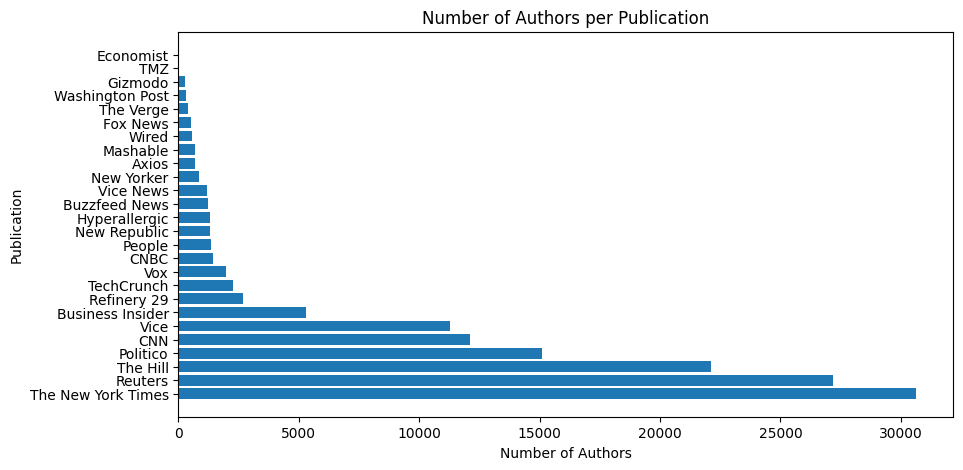

In [64]:
fig = plt.figure(figsize=(10, 5))
fig.tight_layout()
plt.barh(y = author.index, width = author.values)
plt.xlabel('Number of Authors')
plt.ylabel('Publication')
plt.title('Number of Authors per Publication')
plt.show()
fig.savefig('authorship')

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = plt.figure(figsize=(5, 5))
plt.barh(

<Figure size 500x500 with 0 Axes>

In [4]:
# Tokenization testing
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
NLP = spacy.load('en_core_web_sm')
nlp = English()
tokenizer = Tokenizer(nlp.vocab)
test_data = data[['article','publication']][0:1000]

In [5]:
df_split = np.array_split(test_data['article'], 8)

In [6]:
data['publication'].value_counts().min()

3332

In [9]:
df_resample = data.groupby('publication', as_index = False).progress_apply(lambda x: x.sample(3332))

100%|██████████| 26/26 [00:00<00:00, 37.48it/s]


In [18]:
df_resample = df_resample.reset_index(drop = True)

In [4]:
test_data['tokens'].progress_apply(lambda x: [token.text.lower() for token in x])

100%|██████████| 100/100 [00:00<00:00, 3075.07it/s]


0     [this, post, is, part, of, polyarchy,, an, ind...
1     [ , the, indianapolis, colts, made, andrew, lu...
2     [davos,, switzerland, (reuters), -, u.s., pres...
3     [paris, (reuters), -, former, french, presiden...
4     [paris, hilton, arrived, at, lax, wednesday, d...
                            ...                        
95    [zurich,, june, 26, (reuters), -, swiss, softw...
96    [software, companies, are, contributing, an, o...
97    [will, smith, is, one, of, the, biggest, movie...
98    [here's, the, rundowntristan, thompson, leaves...
99    [harvey, weinstein, has, been, fired, from, th...
Name: tokens, Length: 100, dtype: object

In [19]:
# Multiprocess testing
from tqdm.contrib.concurrent import process_map
import tqdm
test_data = data[['article','publication']][0:100]
#test_data['tokens'] = process_map(tokenizer, test_data['article'], max_workers = 8)
pool = Pool(8)
result = []
for _ in tqdm.tqdm(pool.imap(tokenizer, test_data['article']), total=len(test_data['article'])):
    result.append(_.text.lower())
pool.close()
test_data['tokens'] = result

100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


In [ ]:
data['tokens'] = data['article'].progress_apply(tokenizer)

 15%|█▍        | 387006/2584165 [20:07<4:46:35, 127.77it/s]

In [2]:
# Multiprocess Testing
from tqdm import tqdm
from multiprocessing import Pool
tqdm.pandas()
from tqdm.contrib.concurrent import process_map #I have found that this is incredibly slow
pool = Pool(6)
data['tokens'] = pool.map(tokenizer, data['article'])
pool.close()
# pool = Pool(8)
# test_data['tokens'] = pool.map(NLP, test_data['article'])
# pool.close()
# data['tokens'] = data['article'].progress_apply(lambda x: [token.text.lower() for token in NLP(x)])

NameError: name 'tokenizer' is not defined

In [1]:
data

NameError: name 'data' is not defined

In [2]:
# Tokenize our texts
from tqdm import tqdm
from multiprocessing import Pool
tqdm.pandas()
from tqdm.contrib.concurrent import process_map
NLP = spacy.load('en_core_web_sm')
data['tokens'] = process_map(NLP, data['article'],max_workers = 8,chunksize = 10)

NameError: name 'spacy' is not defined

In [ ]:
data['tokens'] = data['tokens'].progress_apply(lambda x: [token.text.lower() for token in x])

In [23]:
df_resample['tokens'] = df_resample['article'].progress_apply(tokenizer)

100%|██████████| 86632/86632 [01:36<00:00, 894.13it/s] 


In [27]:
data['publication'].unique()

array(['Vox', 'Business Insider', 'Reuters', 'TMZ', 'Vice', 'Vice News',
       'Hyperallergic', 'TechCrunch', 'Axios', 'Refinery 29', 'The Verge',
       'Mashable', 'People', 'Economist', 'CNN', 'Gizmodo', 'New Yorker',
       'Wired', 'CNBC', 'New Republic', 'Fox News', 'The Hill',
       'Politico', 'The New York Times', 'Buzzfeed News',
       'Washington Post'], dtype=object)

In [31]:
mapping_dict = {}
number = 0
for i in data['publication'].unique():
    mapping_dict[i] = number
    number += 1

In [32]:
data['pub_label'] = data['publication'].map(mapping_dict)

In [35]:
df_resample['pub_label'] = df_resample['publication'].map(mapping_dict)

In [48]:
df_resample['tokens'] = df_resample['tokens'].progress_apply(lambda x: [token.text.lower() for token in x])

100%|██████████| 86632/86632 [00:33<00:00, 2570.67it/s]


In [52]:
df_resample['tokens']

0        [fiat, chrysler, announced, a, $4.5, billion, ...
1        [in, this, age, of, reality, show, politics,, ...
2        [during, a, press, conference, friday,, secret...
3        [city, officials, in, key, west, voted, this, ...
4        [tens, of, thousands, of, general, motors, wor...
                               ...                        
86627    [scientists, and, drug, developers, are, alway...
86628    [sustainability, scientist, andrew, merrie, co...
86629    [2019, was, a, tumultuous, time, for, technolo...
86630    [when, it’s, steep, and, deep, on, the, back, ...
86631    [silicon, valley, has, gotten, a, lot, of, att...
Name: tokens, Length: 86632, dtype: object

# Train test split

In [53]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(df_resample['article'],df_resample['pub_label'], test_size = 0.2, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69305,), (17327,), (69305,), (17327,))

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
mnb = MultinomialNB()

In [55]:
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [57]:
mnb.fit(X_train_vectors, y_train)

MultinomialNB()

In [59]:
from sklearn.metrics import accuracy_score
y_pred = mnb.predict(X_test_vectors)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [83]:
mapping_dict.keys()

dict_keys(['Vox', 'Business Insider', 'Reuters', 'TMZ', 'Vice', 'Vice News', 'Hyperallergic', 'TechCrunch', 'Axios', 'Refinery 29', 'The Verge', 'Mashable', 'People', 'Economist', 'CNN', 'Gizmodo', 'New Yorker', 'Wired', 'CNBC', 'New Republic', 'Fox News', 'The Hill', 'Politico', 'The New York Times', 'Buzzfeed News', 'Washington Post'])

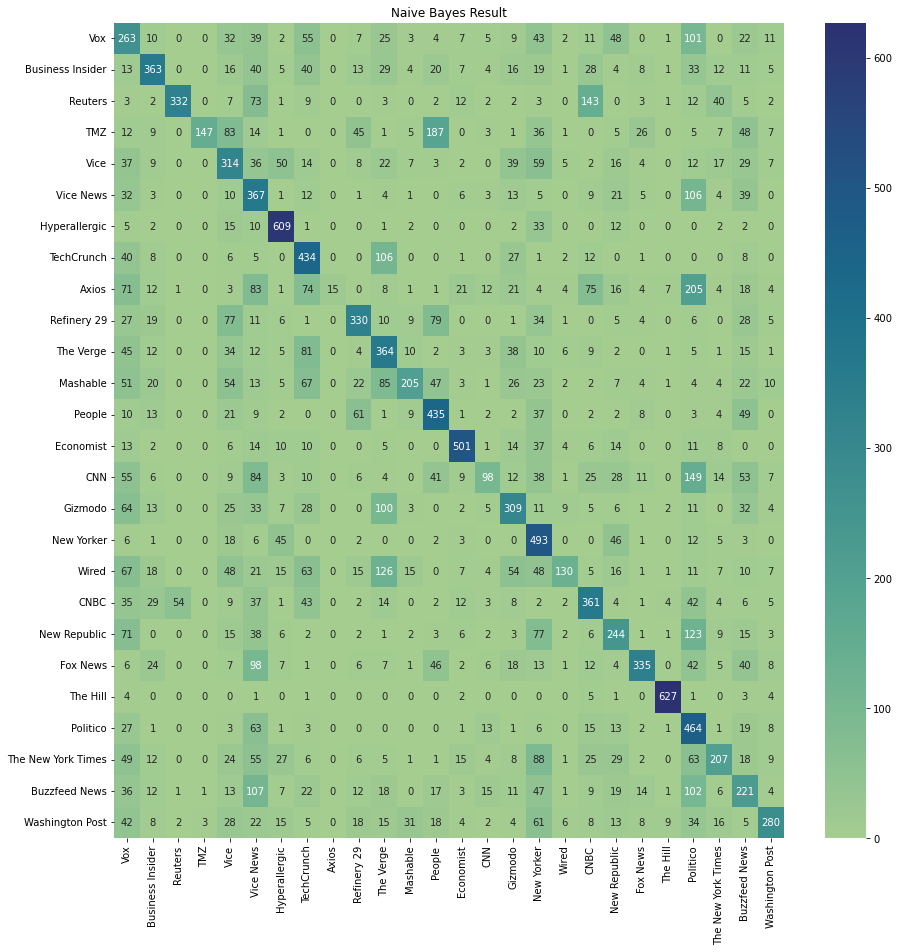

In [90]:
## Create a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(15,15))
sns.heatmap(cfm, cmap='crest',fmt = 'd', annot = True,
           xticklabels = mapping_dict.keys(), yticklabels = mapping_dict.keys())
#plt.imshow(cfm, cmap='crest')
plt.title('Naive Bayes Result')
plt.show()
fig.savefig('Naive Bayes Heatmap',bbox_inches = 'tight')